In [ ]:
# Install necessary packages
!pip install gdown
!apt-get install -y unrar

import gdown

# Define the file ID and the URL
file_id = '160T_rq9KFvIbIh98T7fycW4xJ7gIcwEq'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'NADA_dataset.rar'
gdown.download(url, output, quiet=False)

print(f"File downloaded as {output}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Downloading...
From (original): https://drive.google.com/uc?id=160T_rq9KFvIbIh98T7fycW4xJ7gIcwEq
From (redirected): https://drive.google.com/uc?id=160T_rq9KFvIbIh98T7fycW4xJ7gIcwEq&confirm=t&uuid=67053c93-de4b-4ad8-bff4-589feeba77ce
To: /content/NADA_dataset.rar
100%|██████████| 12.2M/12.2M [00:00<00:00, 25.6MB/s]

File downloaded as NADA_dataset.rar


In [ ]:
import os

# Extract the .rar file
!unrar x NADA_dataset.rar
print("File extracted")

# List the contents of the extracted folder
extracted_folder = 'NADA_dataset'  # Adjust if needed
for root, dirs, files in os.walk(extracted_folder):
    for name in files:
        print(os.path.join(root, name))


Streaming output truncated to the last 5000 lines.
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000217.txt      28%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000218.txt      29%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000219.txt      29%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000220.txt      29%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000221.txt      29%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000222.txt      29%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000223.txt      29%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000224.txt      29%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000225.txt      29%  OK 
Extracting  Text files of NADA dataset/القانون-علوم اجتماعية/law000

In [ ]:
import os
import pandas as pd

# Path to the folder containing your dataset
base_path = '/content/Text files of NADA dataset'


In [ ]:
import os
import pandas as pd

def load_data_from_folder(folder_path):
    data = []
    encodings = ['utf-8', 'latin-1', 'iso-8859-1']  # List of possible encodings

    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for file_name in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file_name)

                # Attempt to read the file with different encodings
                for encoding in encodings:
                    try:
                        with open(file_path, 'r', encoding=encoding) as file:
                            text = file.read()
                        data.append({'text': text, 'label': subfolder})
                        break  # Exit the encoding loop if successful
                    except UnicodeDecodeError:
                        continue  # Try the next encoding

    return data

# Load data and create DataFrame
data = load_data_from_folder(base_path)
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df


,text,label
0,﻿ الكون - الابراج عودة للصفحة الرئيسية - سجل ا...,فلك-علوم بحتة
1,﻿ موقع الكون - الفزياء والكون - الضوء عودة للص...,فلك-علوم بحتة
2,﻿ الكون - الابراج عودة للصفحة الرئيسية - سجل ا...,فلك-علوم بحتة
3,﻿ الكون - الابراج عودة للصفحة الرئيسية - سجل ا...,فلك-علوم بحتة
4,﻿ موقع الكون - المجموعة الشمسية - الكواكب عودة...,فلك-علوم بحتة
...,...,...
7315,﻿تقام اليوم الاثنين بمدينة مارسيليا الفرنسية ا...,الأدب العربي-أدبيات
7316,﻿وفور وصوله قص الشريط ايذانا بافتتاح المعرض ثم...,الأدب العربي-أدبيات
7317,﻿خصص صالون الأدب العربي ببروكسل دورته الرابعة ...,الأدب العربي-أدبيات
7318,﻿صدر عن دار نهضة مصر للنشر خمس كتب جديدة للكات...,الأدب العربي-أدبيات


In [ ]:
import pandas as pd

# Count the occurrences of each label
class_distribution = df['label'].value_counts()

print(class_distribution)


label
القانون-علوم اجتماعية      1645
رياضة                      1417
الإقتصاد-علوم إجتماعية     1308
عام-إسلام-ديانات            516
علوم صحية-علوم تطبيقية      429
فلك-علوم بحتة               401
السياسة-علوم اجتماعية       401
علم الكمبيوتر-علوم بحتة     401
عام- فنون                   401
الأدب العربي-أدبيات         401
Name: count, dtype: int64


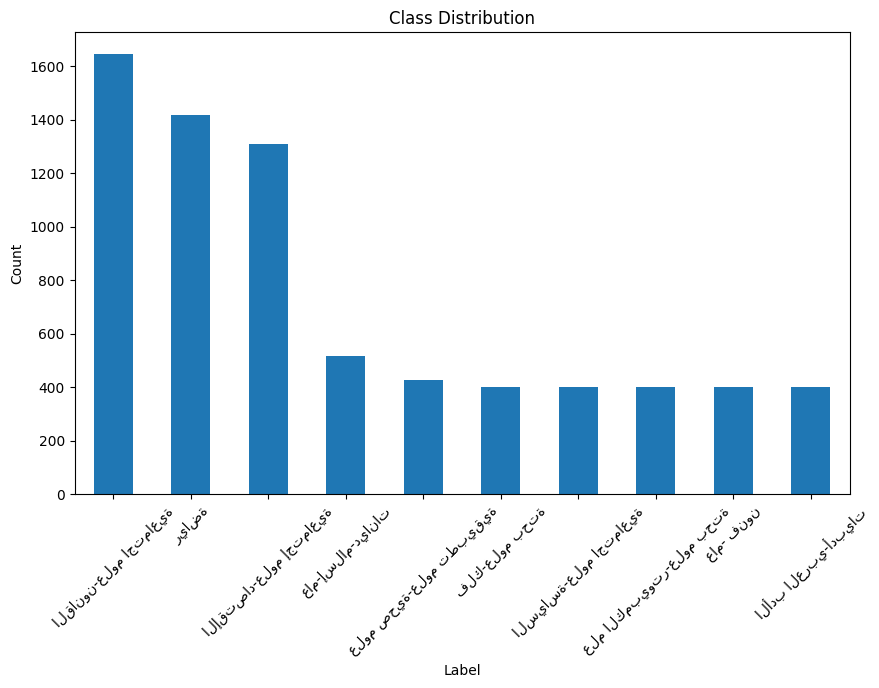

In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Compute class proportions
class_proportions = df['label'].value_counts(normalize=True)

print(class_proportions)


label
القانون-علوم اجتماعية      0.224727
رياضة                      0.193579
الإقتصاد-علوم إجتماعية     0.178689
عام-إسلام-ديانات           0.070492
علوم صحية-علوم تطبيقية     0.058607
فلك-علوم بحتة              0.054781
السياسة-علوم اجتماعية      0.054781
علم الكمبيوتر-علوم بحتة    0.054781
عام- فنون                  0.054781
الأدب العربي-أدبيات        0.054781
Name: proportion, dtype: float64


In [ ]:
pip install nltk

In [ ]:
import re
#import arabic_reshaper
from pyarabic.araby import strip_tatweel
from camel_tools.utils.normalize import normalize_unicode, normalize_alef_maksura_ar, normalize_alef_ar, normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import FastText
from nltk.stem.isri import ISRIStemmer


# Step 1: Normalize text
def normalize_text(text):
    text = strip_tatweel(text)                 # Removing tatweel  العـــــربية to العربية
    text = normalize_unicode(text)             #بسم الله الرحمن الرحيم
    text = normalize_alef_ar(text)             #Normalizes Alef characters in Arabic text.
    text = normalize_alef_maksura_ar(text)     #Converts Alef Maksura to Yeh (ى) character.
    text = normalize_teh_marbuta_ar(text)      #Normalizes Teh Marbuta characters (ة) in Arabic text
    return text

# Step 2: Remove diacritics   # التشكيل
def remove_diacritics(text):
    return dediac_ar(text)

# Step 3: Tokenization and cleaning
def tokenize_and_clean(text):
    tokens = word_tokenize(text)
    arabic_tokens = [word for word in tokens if re.match(r'^[\u0600-\u06FF]+$', word)]
    cleaned_tokens = [re.sub(r'[^\w\s]', '', word) for word in arabic_tokens] #  removes ny character that is not a word character (alphanumeric and underscores) or whitespace
    return cleaned_tokens

# Step 4: Stopword removal
def remove_stopwords(tokens):
    nltk_stopwords = set(stopwords.words('arabic'))
    filtered_tokens = [token for token in tokens if token not in nltk_stopwords]
    return filtered_tokens

# Step 5: Stemming
def stem_tokens(tokens):
    stemmer = ISRIStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def vectorize_text(texts, method):
    if method == 'tfidf':
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform(texts)
    elif method == 'fasttext':
        # Tokenize the texts
        processed_texts = [text.split() for text in texts]

        # Create and train FastText model
        model = FastText(vector_size=100, min_count=1, window=5, epochs=10)
        model.build_vocab(corpus_iterable=processed_texts)
        model.train(corpus_iterable=processed_texts, epochs=model.epochs, total_examples=model.corpus_count)

        # Generate vectors by averaging word vectors
        vectors = np.array([
            np.mean([model.wv[word] for word in text if word in model.wv] or [np.zeros(model.vector_size)], axis=0)
            for text in processed_texts
        ])
    else:
        raise ValueError("Invalid vectorization method")
    return vectors



In [ ]:
df['normalized_text'] = df['text'].apply(normalize_text)


In [ ]:
df['no_diacritics_text'] = df['normalized_text'].apply(remove_diacritics)


In [ ]:
df['cleaned_tokens'] = df['no_diacritics_text'].apply(tokenize_and_clean)


In [ ]:
df['filtered_tokens'] = df['cleaned_tokens'].apply(remove_stopwords)


In [ ]:
df['stemmed_tokens'] = df['filtered_tokens'].apply(stem_tokens)


In [ ]:
df['preprocessed_text'] = df['stemmed_tokens'].apply(lambda tokens: " ".join(tokens))


In [ ]:
tfidf_vectors = vectorize_text(df['preprocessed_text'].tolist(), method='tfidf')


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline  # Use imblearn's Pipeline to include SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Prepare your data
X_cla = df['preprocessed_text']
y_cla = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cla, y_cla, test_size=0.33, random_state=42)

# Define the pipeline with TfidfVectorizer, SMOTE, and SVC
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Vectorizer step
    ('smote', SMOTE(random_state=42)),  # SMOTE step
    ('classifier', SVC())               # Classifier step
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9868


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

    الأدب العربي-أدبيات       1.00      1.00      1.00       117
 الإقتصاد-علوم إجتماعية       0.99      0.98      0.98       426
  السياسة-علوم اجتماعية       0.94      0.99      0.97       136
  القانون-علوم اجتماعية       0.98      0.99      0.99       550
                  رياضة       1.00      1.00      1.00       453
              عام- فنون       1.00      0.98      0.99       138
       عام-إسلام-ديانات       0.99      0.97      0.98       165
علم الكمبيوتر-علوم بحتة       0.97      0.96      0.96       141
 علوم صحية-علوم تطبيقية       0.99      0.98      0.99       149
          فلك-علوم بحتة       0.99      0.99      0.99       141

               accuracy                           0.99      2416
              macro avg       0.99      0.98      0.98      2416
           weighted avg       0.99      0.99      0.99      2416



In [ ]:
from sklearn.metrics import accuracy_score

# Example new data and their true labels
new_data = ["مصر تفوز على رواندا في مباراة كرة القدم" , "فوز فريق كرة السلة بالمباراة النهائية"]
true_labels = ["رياضة", "رياضة"]  # Replace with actual labels

# Use the pipeline to make predictions on the new data
new_predictions = pipe.predict(new_data)

# Calculate accuracy
accuracy = accuracy_score(true_labels, new_predictions)

# Print predictions and accuracy
for text, prediction in zip(new_data, new_predictions):
    print(f"Text: {text}\nPrediction: {prediction}\n")

print(f"Accuracy on new data: {accuracy:.4f}")


Text: مصر تفوز على رواندا في مباراة كرة القدم
Prediction: رياضة

Text: فوز فريق كرة السلة بالمباراة النهائية
Prediction: رياضة

Accuracy on new data: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline  # Use imblearn's Pipeline to include SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Prepare your data
X_cla = df['preprocessed_text']
y_cla = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cla, y_cla, test_size=0.33, random_state=42)

# Define pipelines for each model with SMOTE included
pipelines = {
    'SVC': Pipeline([
        ('vectorizer', TfidfVectorizer()),  # Vectorizer step
        ('smote', SMOTE(random_state=42)),  # SMOTE step
        ('classifier', SVC(kernel='linear', random_state=42))  # SVC classifier
    ]),
    'Random Forest': Pipeline([
        ('vectorizer', TfidfVectorizer()),  # Vectorizer step
        ('smote', SMOTE(random_state=42)),  # SMOTE step
        ('classifier', RandomForestClassifier(n_estimators=200, max_features='sqrt', criterion='entropy', random_state=42))  # Random Forest classifier
    ]),
    'Naive Bayes': Pipeline([
        ('vectorizer', TfidfVectorizer()),  # Vectorizer step
        ('smote', SMOTE(random_state=42)),  # SMOTE step
        ('classifier', MultinomialNB())  # Naive Bayes classifier
    ]),
    'Logistic Regression': Pipeline([
        ('vectorizer', TfidfVectorizer()),  # Vectorizer step
        ('smote', SMOTE(random_state=42)),  # SMOTE step
        ('classifier', LogisticRegression(random_state=42))  # Logistic Regression classifier
    ])
}

# Dictionary to store the best estimators
best_estimators = {}

for model_name, pipeline in pipelines.items():
    print(f"Training {model_name}...")

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy and classification report
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Classification report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*60 + "\n")

    # Store the trained model
    best_estimators[model_name] = pipeline


Training SVC...
Accuracy for SVC: 0.9822
Classification report for SVC:

                         precision    recall  f1-score   support

    الأدب العربي-أدبيات       0.98      0.98      0.98       117
 الإقتصاد-علوم إجتماعية       0.99      0.97      0.98       426
  السياسة-علوم اجتماعية       0.91      0.99      0.95       136
  القانون-علوم اجتماعية       0.99      0.99      0.99       550
                  رياضة       1.00      1.00      1.00       453
              عام- فنون       1.00      0.98      0.99       138
       عام-إسلام-ديانات       0.98      0.96      0.97       165
علم الكمبيوتر-علوم بحتة       0.95      0.96      0.96       141
 علوم صحية-علوم تطبيقية       0.99      0.97      0.98       149
          فلك-علوم بحتة       0.98      0.99      0.99       141

               accuracy                           0.98      2416
              macro avg       0.98      0.98      0.98      2416
           weighted avg       0.98      0.98      0.98      2416


-------------

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Prepare your data
X_cla = df['preprocessed_text']
y_cla = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cla, y_cla, test_size=0.33, random_state=42)

# Define the pipeline with TfidfVectorizer, SMOTE, and SVC
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Vectorizer step
    ('smote', SMOTE(random_state=42)),  # SMOTE step
    ('classifier', SVC())               # Classifier step
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipe.predict(X_train)
# Predict on the test data
y_test_pred = pipe.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Training Accuracy: 0.9976
Test Accuracy: 0.9868


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Define your features and labels
X_cla = df['preprocessed_text']
y_cla = df['label']

# Define the pipeline with TfidfVectorizer, SMOTE, and SVC
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Vectorizer step
    ('smote', SMOTE(random_state=42)),  # SMOTE step
    ('classifier', SVC())               # Classifier step
])

# Perform cross-validation
cv_scores = cross_val_score(pipe, X_cla, y_cla, cv=5)  # Using 5-fold cross-validation

# Output the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.99043716 0.99043716 0.9897541  0.98907104 0.9795082 ]
Mean CV Score: 0.9878
Standard Deviation of CV Scores: 0.0042
